Let's start a new notebook.

We've already taken a look at some plotting.  One of the big advantages of Jupyter Notebooks is the ability to mix in code, plots, and explanatory text.  Let's look at some examples:
Go to [http://nb.bianp.net](http://nb.bianp.net), maybe under "Most Recent", and find one or two that look interesting

(coin flipping, matplotlib)

Another few bio-relevant ones:
* https://github.com/theandygross/TCGA
* https://github.com/ctb/2012-paper-diginorm

There's a few things we see here:
* Plain text
* Headings
* Math in some cases
* Nicer layout

So now we're going to learn how to do that.

Type some text in a cell:

This is some introductory text.  

Now, before pressing Shift-Enter, Go up to Cell>Cell Type and select Markdown.  _Now_ press shift Enter


Note that the dropdown box that usually says `Code` says markdown when you select that cell.  You can use that too and save a couple of clicks.

Under Help>Markdown, Basic Writing and Formatting Syntax, we can see some description about how to format text:

```
## This is a level 2 heading

We can make things _italic_ or **bold** -- see how it even sort-of formats as we're typing!

We can make lists like this:

* List item one
* List item two
    * Sub-item one
    * Sub-item two
* And so on

And we can make [nice links to things](http://www.google.com)
```

If we need to use equations, we can use latex:

This is an example `$a^2 + b^2 = c^2$` of an inline equation; we can also specify a display equation

```
$$
\left ( \begin{array}{c} x \\ y \\ z \end{array} \right ) = \frac{1}{2} {\bf A } 
$$
```

By the way, if you end up using Jupyter a lot, there are a lot of hot-keys you can use to save yourself some time.
    
So for instance, `<Esc>-m` will switch the current cell to markdown, and `<Esc>-y`
back to code.

`<Esc>-l` will give you line numbers.  You can see them all with `<Esc>-h`.

So let's start making our first fancy notebook.  We're going to look at some Affymetrix chip gene expression data that comes in biobase:

In [1]:
suppressPackageStartupMessages(library(Biobase))

In [2]:
dataDirectory <- system.file("extdata", package="Biobase")
exprsFile <- file.path(dataDirectory, "exprsData.txt")
expression <- read.table(exprsFile, header=TRUE, sep="\t")

metaDataFile = file.path(dataDirectory, "pData.txt")
metaData = read.table(metaDataFile, header=TRUE, sep="\t")

In [3]:
head(expression)

,Feature,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
1,AFFX-MurIL2_at,192.742,85.7533,176.757,135.575,64.4939,76.3569,160.505,65.9631,56.9039,135.608,63.4432,78.2126,83.0943,89.3372,91.0615,95.9377,179.845,152.467,180.834,85.4146,157.989,146.8,93.8829,103.855,64.434,175.615
2,AFFX-MurIL10_at,97.137,126.196,77.9216,93.3713,24.3986,85.5088,98.9086,81.6932,97.8015,90.4838,70.5733,94.5418,75.3455,68.5827,87.405,84.4581,87.6806,108.032,134.263,91.4031,-8.68811,85.0212,79.2998,71.6552,64.2369,78.7068
3,AFFX-MurIL4_at,45.8192,8.83135,33.0632,28.7072,5.94492,28.2925,30.9694,14.7923,14.2399,34.4874,20.3521,14.1554,20.6251,15.9231,20.1579,27.8139,32.7911,33.5292,19.8172,20.419,26.872,31.1488,22.342,19.0135,12.1686,17.378
4,AFFX-MurFAS_at,22.5445,3.60093,14.6883,12.3397,36.8663,11.2568,23.0034,16.2134,12.0375,4.54978,8.51782,27.2852,10.1616,20.2488,15.7849,14.3276,15.9488,14.6753,-7.91911,12.8875,11.9186,12.8324,11.139,7.55564,19.9849,8.96849
5,AFFX-BioB-5_at,96.7875,30.438,46.1271,70.9319,56.1744,42.6756,86.5156,30.7927,19.7183,46.352,39.1326,41.7698,80.2197,36.4903,36.4021,35.3054,58.6239,114.062,93.4402,22.5168,48.6462,90.2215,42.0053,57.5738,44.8216,61.7044
6,AFFX-BioB-M_at,89.073,25.8461,57.2033,69.9766,49.5822,26.1262,75.0083,42.3352,41.1207,91.5307,39.9136,49.8397,63.4794,24.7007,47.4641,47.3578,58.1331,104.122,115.831,58.1224,73.4221,64.6066,40.3068,41.8209,46.1087,49.4122


In [4]:
head(metaData,10)

,id,gender,type,score
1,A,Female,Control,0.75
2,B,Male,Case,0.4
3,C,Male,Control,0.73
4,D,Male,Case,0.42
5,E,Female,Case,0.93
6,F,Male,Control,0.22
7,G,Male,Case,0.96
8,H,Male,Case,0.79
9,I,Female,Case,0.37
10,J,Male,Control,0.63


In [5]:
nrow(expression)

[1] 500

In [6]:
summary(expression$A)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-175.90   27.42   79.86  333.70  229.30 9903.00 

Let's see how gene expressions between case A (Female:Control) and case E (Female:Case) compare:

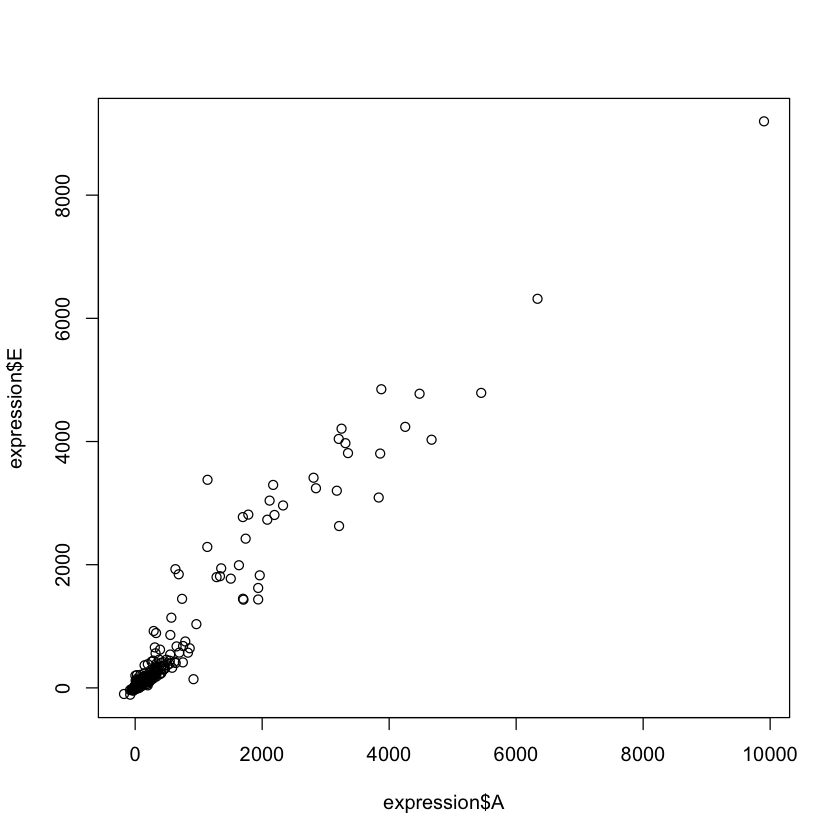

In [7]:
plot(expression$A, expression$E)

This plot is kind of huge!  We can set options to make them a more manageable size:

In [8]:
options(repr.plot.height=4, repr.plot.width=4)

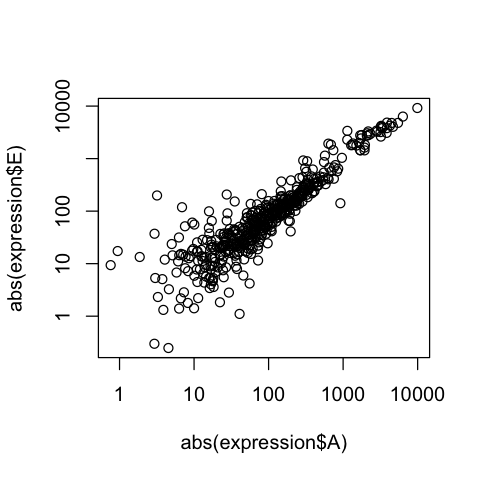

In [9]:
plot(abs(expression$A), abs(expression$E), log="xy")

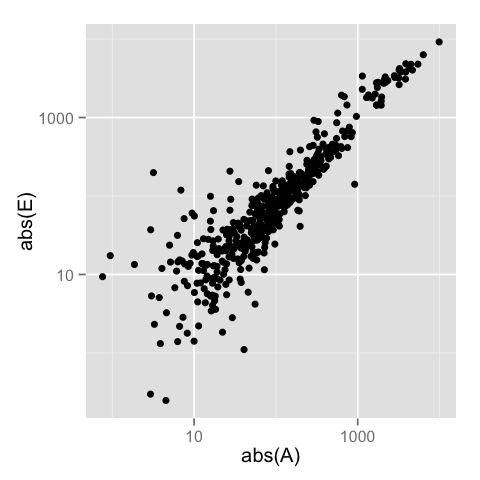

In [10]:
library(ggplot2)
ggplot(expression) + geom_point(aes(x=abs(A), y=abs(E))) + scale_x_log10() + scale_y_log10()

We can look to see how well they are correlated, or how well a linear fit matches them:

In [11]:
head(cor(expression))

ERROR: Error in cor(expression): 'x' must be numeric


In [12]:
fit.AE <- lm(E~A, data=expression)
summary(fit.AE)


Call:
lm(formula = E ~ A, data = expression)

Residuals:
     Min       1Q   Median       3Q      Max 
-1050.18   -49.03   -22.75    -0.69  2194.50 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.14933   11.02953   0.467    0.641    
A            1.03437    0.01182  87.480   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.3 on 498 degrees of freedom
Multiple R-squared:  0.9389,	Adjusted R-squared:  0.9388 
F-statistic:  7653 on 1 and 498 DF,  p-value: < 2.2e-16


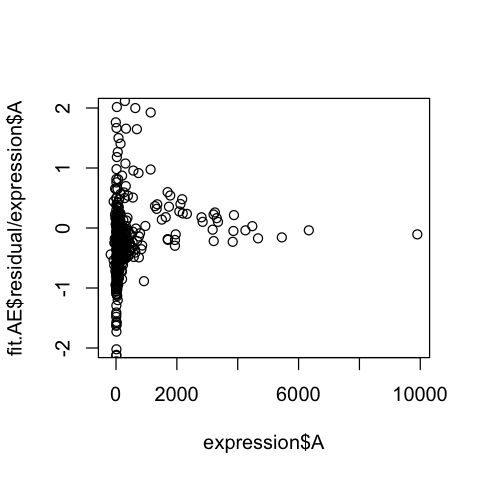

In [13]:
plot(expression$A, fit.AE$residual/expression$A, ylim=c(-2,2))

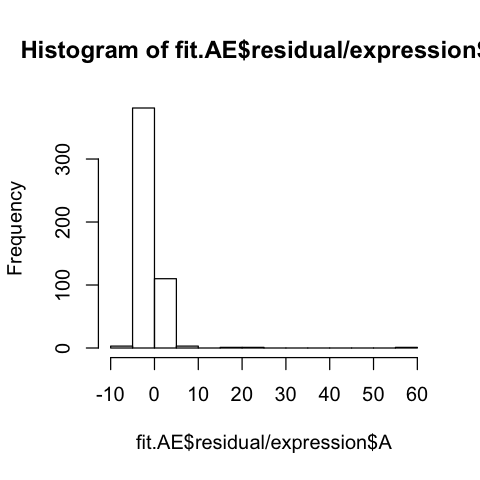

In [14]:
hist(fit.AE$residual/expression$A)

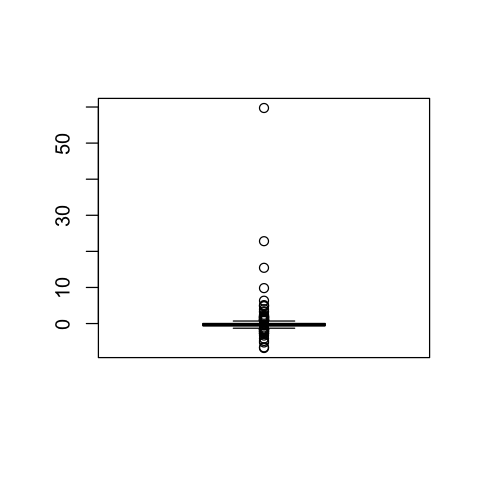

In [15]:
boxplot(fit.AE$residual/expression$A)

So let's give ourselves 10 minutes to make a nice looking notebook exploring this data and answering one question.  Examples:

* How does the correlation between one case (say, female control/case) compare to a different one (say, female control/male control)?
* What genes are most different between two similar subjects with different scores? 
* Which genes have the higest variance across samples?

Do this with headers, explanatory text, plots, equations if appropriate.  Bonus points: Kernel>Restart and Run All as a final step

(Make notebook.  Afterwards, use `jupyter nbconvert --to html --post serve` and add newslide markers and then do `jupyter nbconvert --to slides --post serve` )